In [ ]:
!git clone https://github.com/engelberger/von-mises.git
%cd von-mises/
!SETUPTOOLS_SCM_PRETEND_VERSION=0.1.0 python -m pip install -e ".[dev]" && pip install pytest && python -m pytest -v

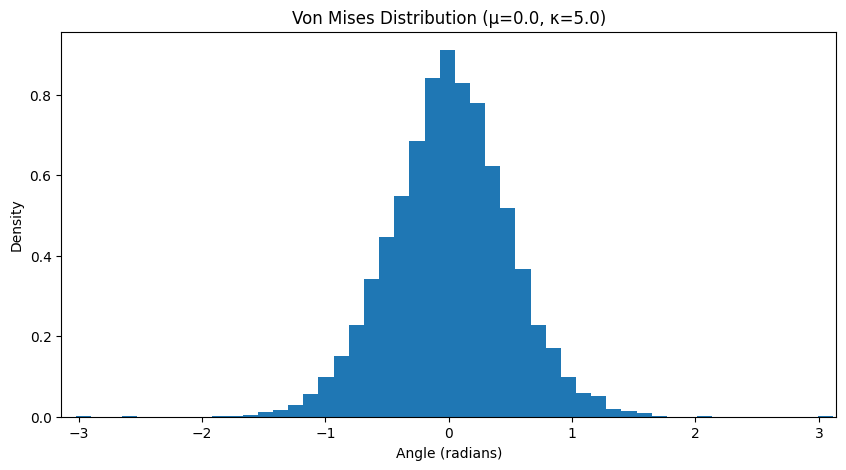

In [1]:
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from jax_von_mises import sample_von_mises

# Set up parameters
key = random.PRNGKey(42)
loc = 0.0  # mean direction
concentration = 5.0  # concentration parameter (higher = more concentrated)

# Generate samples
samples = sample_von_mises(key, loc, concentration, shape=(10000,))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=50, density=True)
plt.title(f'Von Mises Distribution (μ={loc}, κ={concentration})')
plt.xlabel('Angle (radians)')
plt.ylabel('Density')
plt.xlim(-jnp.pi, jnp.pi)
plt.show()


In [2]:
# JIT compilation - Fix by marking the 'shape' parameter (index 3) as static
jitted_sampler = jax.jit(sample_von_mises, static_argnums=(3,))

# Time comparison
%timeit sample_von_mises(key, 0.0, 2.0, shape=(10000,))
%timeit jitted_sampler(key, 0.0, 2.0, shape=(10000,))

# Vectorization with vmap
vmapped_sampler = jax.vmap(
    lambda k, l, c: sample_von_mises(k, l, c, shape=(1000,)),
    in_axes=(0, 0, 0)
)

# Generate keys and parameters for 5 distributions
keys = random.split(key, 5)
locs = jnp.linspace(-jnp.pi/2, jnp.pi/2, 5)
concs = jnp.array([0.5, 1.0, 2.0, 5.0, 10.0])

# Sample in parallel
parallel_samples = vmapped_sampler(keys, locs, concs)
print(parallel_samples.shape)  # (5, 1000)

14.2 s ± 1.23 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
171 μs ± 23.8 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
(5, 1000)
